# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

Felix Marcia

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

# CONSTANTS
g = 9.8    

# PARAMETERS
L1 = 1.0 # length of primary pendulum arm
L2 = 1.0 # length of secondary pendulum arm
theta1_0 = .95 # initial displacement of primary bob in radians
theta2_0 = .95 # initial displacement of secondary bob in radians 
omega1_0 = 0.0 # initial angular velocity of primary bob
omega2_0 = 0.0 # initial angular velocity of prim
dt = 0.01      # time sampling spacing
t_final = 11.0 # total number of seconds to run

def omega1f(theta1, theta2, omega1, omega2, t):
    """d(theta1)/dt"""
    return omega1

def omega1dotf(theta1, theta2, omega1, omega2, t):
    """d(omega1)/dt"""
    return -1*((omega1**2)*sin(2*theta1 - 2*theta2)+2*(omega2**2)*sin(theta1 - theta2)+(g/L1)*(sin(theta1 - 2*theta2)+3*sin(theta1))/(3 - cos(2*theta1 - 2*theta2)))

def omega2f(theta1, theta2, omega1, omega2, t):
    """d(theta2)/dt"""
    return omega2

def omega2dotf(theta1, theta2, omega1, omega2, t):
    """d(omega2)/dt"""
    return (4*(omega1**2)*sin(theta1 - theta2) + (omega2**2)*sin(2*theta1 - 2*theta2)+2*(g/L1)*(sin(2*theta1 - theta2) - sin(theta2)) /(3 - cos(2*theta1 - 2*theta2)))

# TIME SLICES (depends on dt and t_final)
tpoints = np.arange(0, t_final, dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta1_points = []
    theta2_points = []
    omega1_points = []
    omega2_points = []
    
    
    # Initialize theta, omega
    theta1 = theta1_0
    theta2 = theta2_0
    omega1 = omega1_0
    omega2 = omega2_0
    
    for t in tpoints:
        
        # Record theta, omega
        theta1_points.append(theta1)
        theta2_points.append(theta2)
        omega1_points.append(omega1)
        omega2_points.append(omega2)
            
        # Time step using Runge-Kutta
        ## FILL THIS IN
        k11 = dt * omega1f(theta1_points[-1], theta2_points[-1], omega1_points[-1], omega2_points[-1], t)
        k12 = dt * omega2f(theta1_points[-1], theta2_points[-1], omega1_points[-1], omega2_points[-1], t)
        k21 = dt * omega1f(theta1_points[-1] + .5 * k11, theta2_points[-1] + .5 * k12, omega1_points[-1], omega2_points[-1], t + .5 * dt)
        k22 = dt * omega2f(theta1_points[-1] + .5 * k12, theta2_points[-1] + .5 * k12, omega1_points[-1], omega2_points[-1], t + .5 * dt)
        l11 = dt * omega1dotf(theta1_points[-1], theta2_points[-1], omega1_points[-1], omega2_points[-1], t)
        l12 = dt * omega2dotf(theta1_points[-1], theta2_points[-1], omega1_points[-1], omega2_points[-1], t)
        l21 = dt * omega1dotf(theta1_points[-1] + .5 * l11, theta2_points[-1] + .5 * l12, omega1_points[-1], omega2_points[-1], t + .5 * dt)
        l22 = dt * omega2dotf(theta1_points[-1] + .5 * l11, theta2_points[-1] + .5 * l12, omega1_points[-1], omega2_points[-1], t + .5 * dt)
        
        theta1 += k21 # FIX THIS
        theta2 += k22 # FIX THIS
        omega1 += l21 # FIX THIS
        omega2 += l22 # FIX THIS
        
        # Note: the arguments of f(...) and h(...) should use 
        # theta_points[-1] and omega_points[-1].
        #
        # This is to ensure that you update theta and omega simultaneously. 
        # For example, if you were doing Euler (correct):
        # omega(i+1) = omega(i) + dt*f(theta(i), omega(i), t)
        #
        # versus (incorrect)
        # omega(i+1) = omega(i) + dt*f(theta(i+1), omega(i), t)

    tt = np.array(tpoints)
    thetas1 = np.array(theta1_points)
    thetas2 = np.array(theta2_points)
    omegas1 = np.array(omega1_points)
    omegas2 = np.array(omega2_points)
    
    return tt, thetas1, thetas2 , omegas1, omegas2

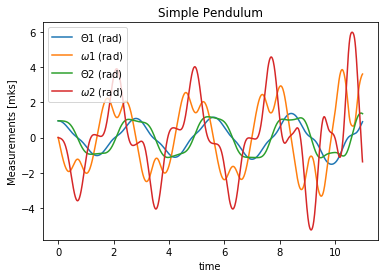

In [194]:
times, thetas1, thetas2, omegas1, omegas2 = time_and_angles()

plt.plot(times, thetas1, label='$\Theta1$ (rad)')
plt.plot(times, omegas1, label='$\omega1$ (rad)')
plt.plot(times, thetas2, label='$\Theta2$ (rad)')
plt.plot(times, omegas2, label='$\omega2$ (rad)')

plt.title("Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

Now to graph the position of the bobs in the x and y positions.

Recall that x = r cos(theta)
            y = r sin(theta)
           
The plan is to make an array of x and y positions for each theta.

In [195]:
thetas1m = np.cos(thetas1)
print(thetas1m)

[ 0.58168309  0.58168309  0.5822929  ...,  0.67570002  0.64907703
  0.62139027]


/Users/FelixMarcia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


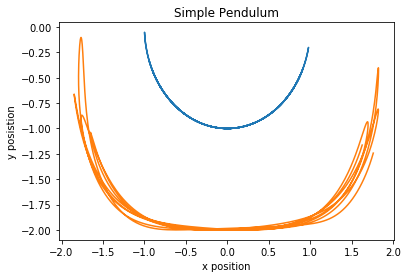

In [199]:
x1 = np.sin(thetas1)
y1 = np.cos(thetas1)
x2 = np.sin(thetas1) + np.sin(thetas2)
y2 = np.cos(thetas1) + np.cos(thetas1)

y1 = y1 * -1
y2 = y2 * -1

plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Simple Pendulum")
plt.xlabel('x position')
plt.ylabel('y posistion')
plt.legend()
plt.show()


## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

# Using my Physics Intuition Before Coding
My guess is that as $\rho$ approaches zero, the voltage along the points in the square would then be a constant of zero.

But assuming non-zero $\rho$, but assuming the distance between the two charge density squares approaches zero, then the total charge density would be zero, yet again resulting in a uniform voltage of zero.

But now assuming the case we have now, a non-zero distance between the two charge squares and a non-zero distance between them. We would expect that since both charge densities are of opposite charges, then the voltage between the two charged squares would be zero.




In [222]:
import numpy as np

# Constants
M = 4        # grid squares per side
V = 1.0        # Voltage at the top
target = 1e-2  # target accuracy

# arrays
phi = np.zeros([M+1,M+1],float) # initialize
phi[1,3] = 1
phi[3,1] = -1
print(phi)
phiprime = np.zeros([M+1, M+1],float) # container for new values

print(phi)

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = 0
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi



[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


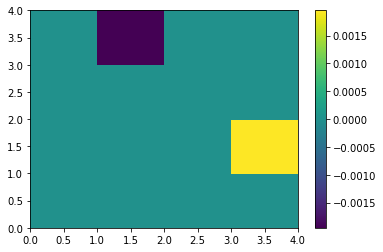

In [223]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()

In [224]:
print(phi)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00195312  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.         -0.00195312  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


I can't derive the equation the Professor Flip derived in class. I can get how he divided the grid into little squares and get an equation for the derivative of the potential with respect to x and y. But the double derivative is the problem. 

What Professor Flip got for the Laplace equation:  
phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4

I just needed to derive the Possion equivalent.